<a href="https://colab.research.google.com/github/maxwellfundi/advanced_deep_learning/blob/main/J_Njiru_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models, Input
import numpy as np
import matplotlib.pyplot as plt


#mnist dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist, x_train_mnist.reshape(-1, 28,28,1).astype('float32')/255.0
x_test_mnist, x_test_mnist.reshape(-1, 28,28,1).astype('float32')/255.0

y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def create_model(activation, input_shape):
  inputs = Input(shape=input_shape)
  x = layers.Conv2D(32, (3,3), activation=activation)(inputs)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3,3), activation=activation)(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3,3), activation=activation)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation=activation)(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=outputs)
  return model

In [3]:
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test,learning_rate, epochs=10):
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
  return history


In [4]:
def plot_comparison(histories,learning_rate):
  plt.figure(figsize=(20,10))
  metrics = ['loss', 'accuracy']

  for i, metric in enumerate(metrics):
    plt.subplot(2,2, i * 2 + 1)
    for lr, history in histories.items():
      plt.plot(history.history[metric], label= f'LR={lr}(Training)')
    plt.title(f'Mnist - Training {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.subplot(2,2, i * 2 + 2)
    for lr, history in histories.items():
      plt.plot(history.history[f'val_{metric}'], label=f'LR={lr}(Validation)')
    plt.title(f'Mnist - Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

  plt.tight_layout()
  plt.show()

Training with learning rate: 0.001
Training with learning rate: 0.01
Training with learning rate: 0.1


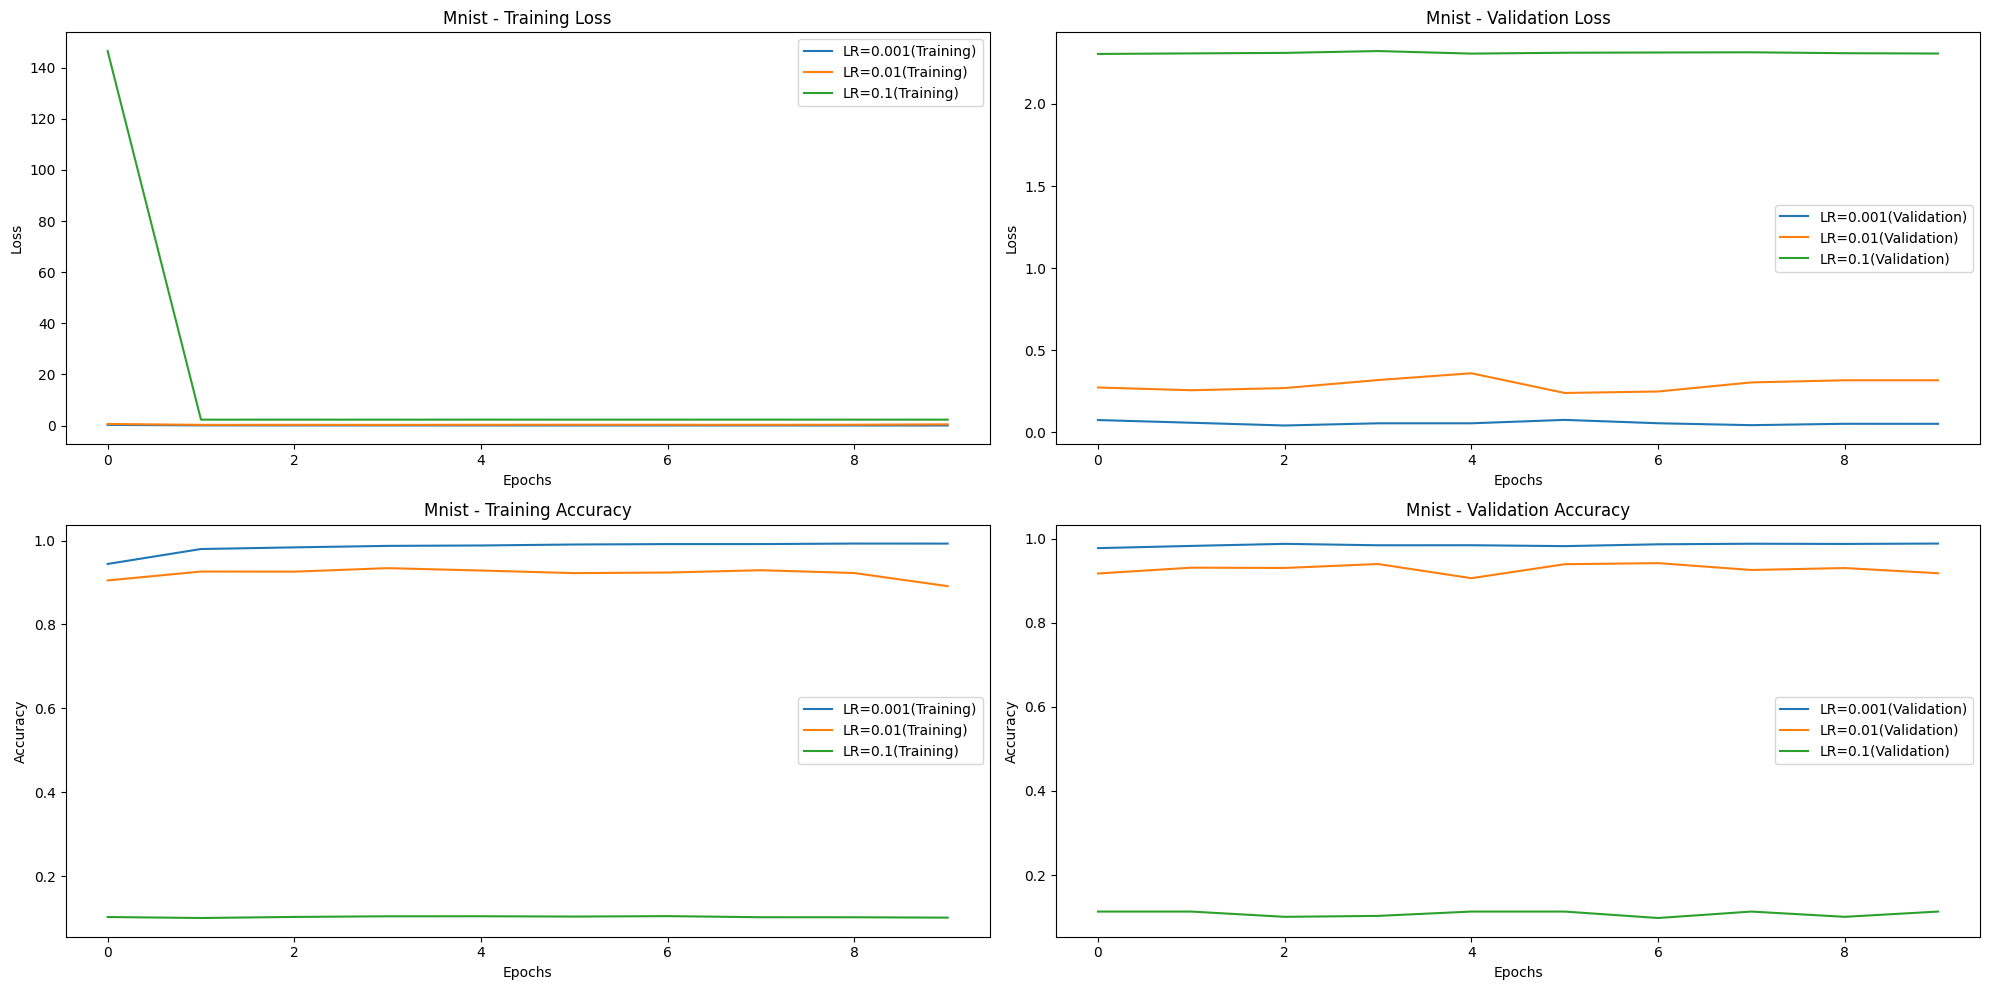

In [5]:
learning_rates = [0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
   print(f"Training with learning rate: {lr}")
   model = create_model('relu', (28,28,1))
   history = train_and_evaluate_model(model, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist,learning_rate= lr, epochs=10)
   histories[lr] = history

plot_comparison(histories,learning_rates)


Notes
- optimiser used is Adam because it has an adaptive learning rate and momentum like features.
- It is very efficient for this dataset for fast convergence
- 3 learning rates were used, and 0.001 perfomes better on training loss, training accuracy as well
- For validation rate for 0.001 was unstable but still it was good. Additionally for the validation accuracy, 0.001 had the highest accuracy on validation.

Conclusion:- Learning 0.001 was the best option for Adam.